# Exploring the estimated annual loss due to natural hazards across the US
## EDS 220, Fall 2022

## Dataset: National Risk Index (NRI) data from the Federal Emergency Management Agency (FEMA) 
- NRI Shapefile States
- NRI Table Counties

## Authors

- Alex Reed, MEDS, UC Santa Barbara (areed@ucsb.edu)<br>
- Erica Dale, MEDS, UC Santa Barbara (ericadale@ucsb.edu)<br>
- Michelle Lam, MEDS, UC Santa Barbara (michellelam@ucsb.edu) <br>
- Wen-Tien Wang, PhD, UC Santa Barbara (wentien@ucsb.edu)

## Table of Contents

[1. Purpose](#purpose)

[2. Dataset Description](#overview)

[3. Data I/O](#io)

[4. Metadata Display and Basic Visualization](#display)

[5. Use Case Examples](#usecases)

[6. Binder Environment](#binder)

[7. References](#references)

<a id='purpose'></a> 
### Notebook Purpose

This notebook provides an introduction to using National Risk Index (NRI) data. This data is made available by the Federal Emergency Management Agency (FEMA) and is freely accessible. The purpose of this project is to assess the Expected Annual Loss (EAL) due to natural hazards affecting states across the United States. The notebook provides instruction and example code on how to pull in the NRI data directly from the source, create some basic visualizations, and shows how the data can be applied to specific use cases. Historic and current data acquisition is important for planners, emergency managers, and other decision makers. With improved understanding of natural hazard risk and the relative economic impact of them, communities can take action to reduce the risk specific to that community. The use case examples show how FEMA, local governments, and communities could plan based on the different natural hazards listed in the dataset.

<a id='overview'></a> 
### Dataset Description

The NRI is a dataset and online tool to help illustrate the US communities most at risk for 18 natural hazards: Avalanche, Coastal Flooding, Cold Wave, Drought, Earthquake, Hail, Heat Wave, Hurricane, Ice Storm, Landslide, Lightning, Riverine Flooding, Strong Wind, Tornado, Tsunami, Volcanic Activity, Wildfire, and Winter Weather. The National Risk Index provides relative Risk Index scores and ratings based on data for EAL due to natural hazards, Social Vulnerability, and Community Resilience. For this project, we focused on EAL.

#### Coverage
The states dataset spatially covers the contiguous US and Alaska. The extent used for searching include:<br>
West longitude: -179.2<br>East longitude: -66.9<br> North latitude: 71.4<br> South latitude: 18.9

#### File Format
State level data is in shapefiles accessed through .shp extension. County level data is available in a table format stored as a .csv file. The metadata “NRI_metadata_Novemeber2021” is an XML file accessed through .xml extension. The metadata was last updated on October 12, 2021.

#### Sources
EAL was calculated from the following sources: Arizona State University’s (ASU) Center for Emergency Management and Homeland Security (CEMHS), California Department of Conservation, California Geological Survey, California Office of Emergency Services, Colorado Avalanche Information Center, CoreLogic’s Flood Services, Federal Emergency Management Agency (FEMA), Humanitarian Data Exchange (HDX), Iowa State University's Iowa Environmental Mesonet, National Aeronautics and Space Administration’s (NASA) Cooperative Open Online Landslide Repository (COOLR), National Earthquake Hazards Reduction Program (NEHRP), National Oceanic and Atmospheric Administration’s National Centers for Environmental Information (NCEI), National Oceanic and Atmospheric Administration's National Hurricane Center, National Oceanic and Atmospheric Administration's National Weather Service (NWS), National Oceanic and Atmospheric Administration's Office for Coastal Management, National Oceanic and Atmospheric Administration's Storm Prediction Center, Oregon Department of Geology and Mineral Industries, Smithsonian Institution's Global Volcanism Program, State of Hawaii’s Office of Planning’s Statewide GIS Program, U.S. Army Corps of Engineers’ Cold Regions Research and Engineering Laboratory (CRREL), U.S. Department of Agriculture's (USDA) National Agricultural Statistics Service (NASS), U.S. Forest Service's Fire Modeling Institute's Missoula Fire Sciences Lab, U.S. Forest Service's National Avalanche Center (NAC), U.S. Geological Survey (USGS), U.S. Geological Survey's Landslide Hazards Program, United Nations Office for Disaster Risk Reduction (UNDRR), University of Alaska – Fairbanks' Alaska Earthquake Center, University of Nebraska-Lincoln's National Drought Mitigation Center (NDMC), University of Southern California's Tsunami Research Center, and Washington State Department of Natural Resources.

#### EAL Equations
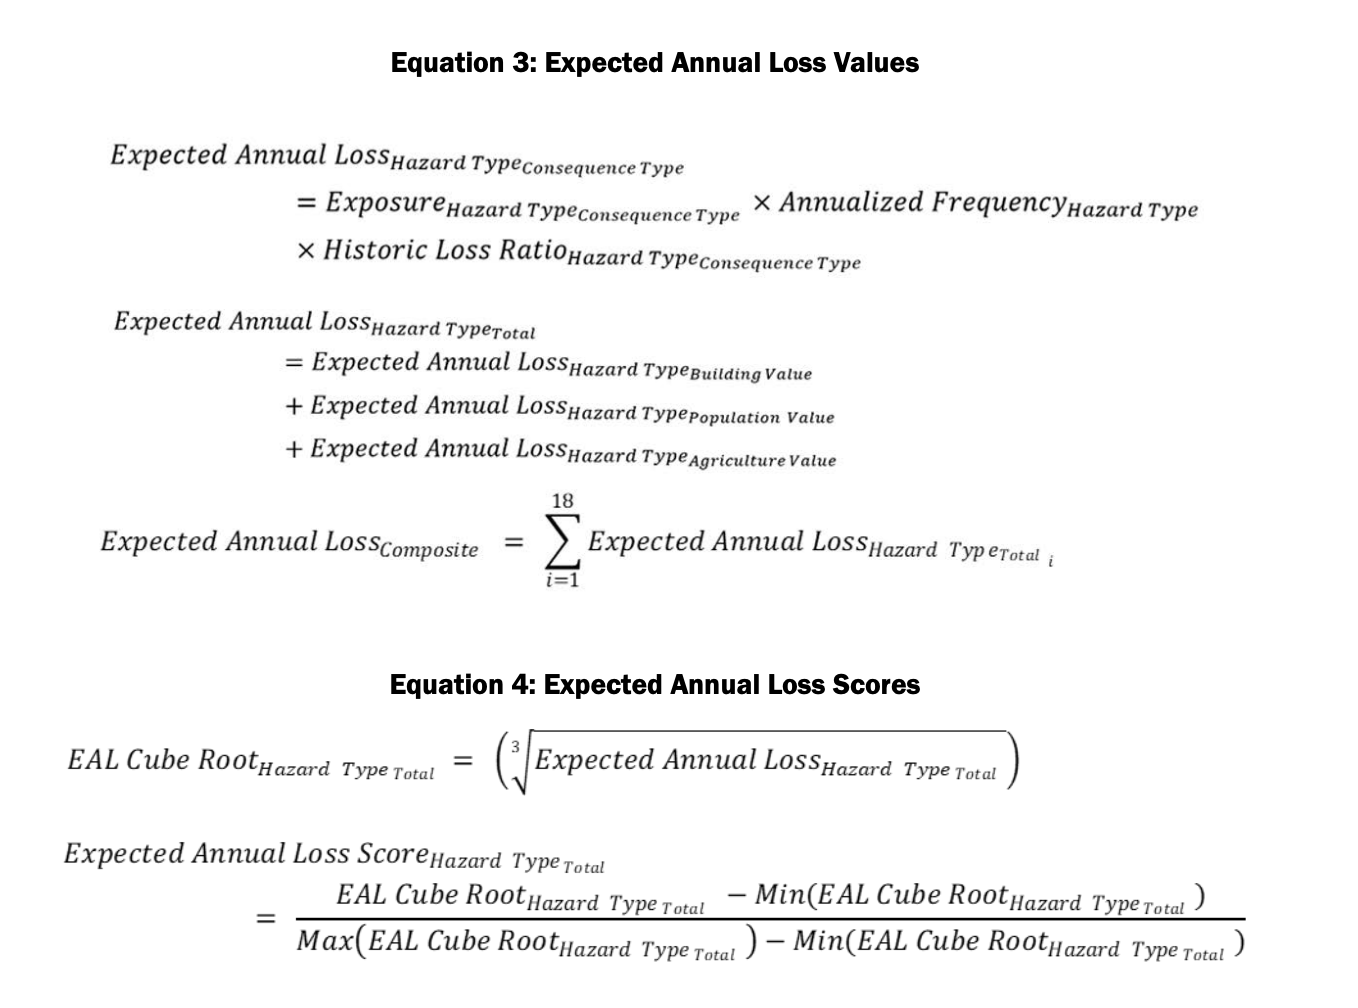

<a id='io'></a> 
### Dataset Input/Output 

1) Import all necessary packages 

In [1]:
import geopandas as gpd
import requests
import zipfile
import io
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import ListedColormap #adjust color map
#from mapclassify import Quantiles, UserDefined
import pandas as pd
from matplotlib.colors import Normalize # for normalise each color equal cross different risk category

2) Set any parameters that will be needed during subsequent portions of the notebook.<br> - set the url location

In [2]:
#url to access the data
url = 'https://hazards.fema.gov/nri/Content/StaticDocuments/DataDownload//NRI_Shapefile_States/NRI_Shapefile_States.zip'

3) Read in the data!

In [3]:
#read in the data
local_path = '../data/' #set file path for where data will be stored
print('Downloading shapefile...')
r = requests.get(url)
z = zipfile.ZipFile(io.BytesIO(r.content))
print("Done")
z.extractall(path=local_path) # extract to folder
filenames = [y for y in sorted(z.namelist()) for ending in ['dbf', 'prj', 'shp', 'shx'] if y.endswith(ending)] 
print(filenames)

Done
['NRI_Shapefile_States.dbf', 'NRI_Shapefile_States.prj', 'NRI_Shapefile_States.shp', 'NRI_Shapefile_States.shx']


In [4]:
#read in the shape file and store as a dataframe
df = gpd.read_file("../data/NRI_Shapefile_States.shp")

<a id='display'></a> 
### Metadata Display and Basic Visualization

The metadata is available as a .doc file which can be opened and previewed on your computer, or as a .xml file. This covers a summary and description, credits, use limitations. The use limitations include that this dataset is meant for planning purposes on a large scale, cannot be applied to local risk assessments. The risk costs will vary from predicted and hazards from surrounding regions can cause indirect losses in community regardless of risk profile. 

The dataset is continually updated but on an irregular frequency.

In [5]:
# An overview of what our data looks like
df.info()

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 51 entries, 0 to 50
Columns: 232 entries, NRI_ID to geometry
dtypes: float64(206), geometry(1), int64(1), object(24)
memory usage: 92.6+ KB


In [6]:
# let's check out our data
df.head()

,NRI_ID,STATE,STATEABBRV,STATEFIPS,POPULATION,BUILDVALUE,AGRIVALUE,AREA,EAL_SCORE,EAL_RATNG,...,WNTW_EALP,WNTW_EALPE,WNTW_EALA,WNTW_EALT,WNTW_EALS,WNTW_EALR,NRI_VER,Shape_Leng,Shape_Area,geometry
0,S01,Alabama,AL,01,4779736,5.026065e+11,5.880985e+09,50646.710241,34.608908,Relatively Moderate,...,0.234974,1.785802e+06,11589.311425,1.971288e+06,38.620314,Relatively Low,November 2021,2.745843e+06,1.899438e+11,"MULTIPOLYGON (((-9804956.966 3536018.071, -980..."
1,S02,Alaska,AK,02,710231,9.066546e+10,7.045900e+07,570885.873384,16.044408,Relatively Low,...,0.075262,5.719919e+05,257.114671,5.809260e+05,25.326769,Very Low,November 2021,1.233706e+08,8.140880e+12,"MULTIPOLYGON (((-19938160.593 6674746.261, -19..."
2,S04,Arizona,AZ,04,6392017,6.314331e+11,2.548788e+09,113590.691628,25.714888,Relatively Moderate,...,0.079516,6.043239e+05,0.002481,6.113015e+05,25.779855,Very Low,November 2021,2.908335e+06,4.340547e+11,"POLYGON ((-12695995.017 4439134.170, -12694655..."
3,S05,Arkansas,AR,05,2915918,2.909845e+11,9.434198e+09,52034.233206,33.859489,Relatively Moderate,...,0.193497,1.470578e+06,565004.577209,1.153451e+07,70.488631,Relatively High,November 2021,2.656502e+06,2.053261e+11,"POLYGON ((-9989043.095 4300705.950, -9989037.1..."
4,S06,California,CA,06,37253956,3.848852e+12,2.885307e+10,155785.663611,100.000000,Very High,...,0.080550,6.121814e+05,0.023056,6.384323e+05,26.172018,Very Low,November 2021,7.112658e+06,6.496194e+11,"MULTIPOLYGON (((-13048004.308 3865271.303, -13..."


In [7]:
# Showing basic statistics for each column variable
df.describe(include = object)

,NRI_ID,STATE,STATEABBRV,STATEFIPS,EAL_RATNG,AVLN_EALR,CFLD_EALR,CWAV_EALR,DRGT_EALR,ERQK_EALR,...,LNDS_EALR,LTNG_EALR,RFLD_EALR,SWND_EALR,TRND_EALR,TSUN_EALR,VLCN_EALR,WFIR_EALR,WNTW_EALR,NRI_VER
count,51,51,51,51,51,51,51,51,51,51,...,51,51,51,51,51,51,51,51,51,51
unique,51,51,51,51,5,6,6,5,5,5,...,6,6,5,5,5,7,6,6,5,1
top,S01,Alabama,AL,01,Relatively Moderate,Not Applicable,Not Applicable,Relatively Low,Relatively Low,Very Low,...,Relatively Moderate,Relatively Moderate,Relatively Low,Relatively Low,Relatively High,Not Applicable,Not Applicable,Very Low,Very Low,November 2021
freq,1,1,1,1,22,36,19,14,19,20,...,18,17,17,13,15,25,44,20,14,51


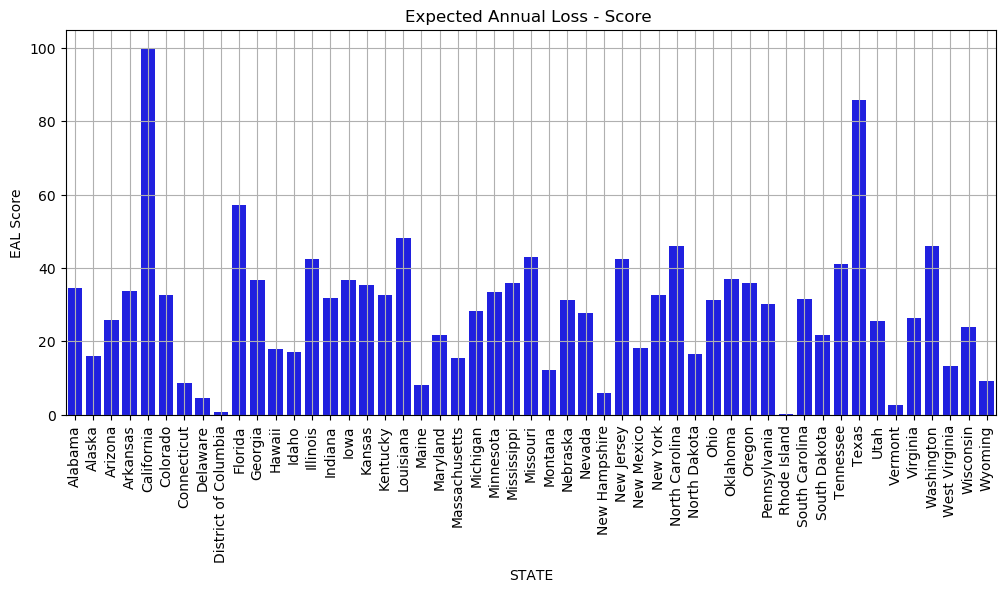

In [8]:
#filter our columns 
EALsummary = df[['STATE','POPULATION','EAL_SCORE','AVLN_EALS','CFLD_EALS','CWAV_EALS','DRGT_EALS','ERQK_EALS','HAIL_EALS','HWAV_EALS','HRCN_EALS','ISTM_EALS','LNDS_EALS','LTNG_EALS','RFLD_EALS','SWND_EALS','TRND_EALS','TSUN_EALS','VLCN_EALS','WFIR_EALS','WNTW_EALS','geometry']]
EALsummary = EALsummary.to_crs(4326)
EALsummary=EALsummary.replace([-9999],[0])
EALsummary.head()

#create a bar chart showing EAL scores across all the states
fig, ax = plt.subplots(figsize=(12,5))
ax = sns.barplot(x = 'STATE', y = 'EAL_SCORE', data = EALsummary, color='blue');
ax.set_title('Expected Annual Loss - Score ')
ax.set_xticklabels(labels=EALsummary['STATE'], rotation=90)
ax.set_ylabel('EAL Score')
ax.set_xlabel('STATE')
plt.grid()
plt.show()

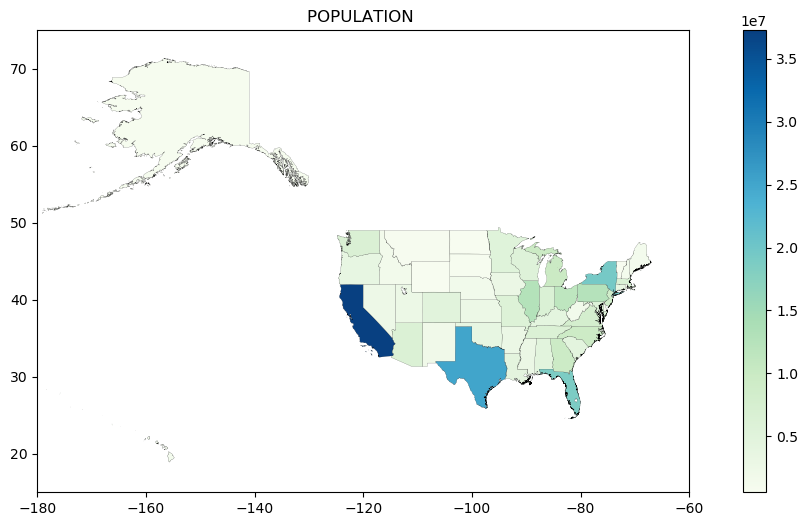

In [9]:
#create x and y min and max to use in the plot boundaries
xmin = -180
ymin = 15
xmax = -60
ymax = 75

# create map with defined extent
fig, ax = plt.subplots(figsize=(14,6))

xlim = (xmin, xmax)
ylim = (ymin, ymax)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.title("POPULATION ")

#create a map showing the populations of each state
EALsummary.plot(column = "POPULATION",legend = True, ax = ax,cmap='GnBu', edgecolor='black', linewidth = .1)


<a id='usecases'></a> 
### Use Case Examples


#### Case 1
FEMA will want to analyze what are the top disaster risks per state to plan for resource allocation. The target users are disaster planners in federal and state agencies. This will allow FEMA to prepare resources for the following year, and create sub-committees focusing on each regional disaster that spans multiple states. We first compare a map of the top disasters per state, we will then continue into finer scales for regional and local disaster preparation.

In [10]:
####FOR LOOP TO SELECT HIGHEST EAL VALUE PER STATE####

# Create array of select columns that contain the EAL values
columns = ['AVLN_EALS','CFLD_EALS','CWAV_EALS','DRGT_EALS','ERQK_EALS','HAIL_EALS','HWAV_EALS','HRCN_EALS','ISTM_EALS','LNDS_EALS','LTNG_EALS','RFLD_EALS','SWND_EALS','TRND_EALS','TSUN_EALS','VLCN_EALS','WFIR_EALS','WNTW_EALS']

for index, state in EALsummary.iterrows():                        # Loop over each row
    largest = columns[0]                                          # Start at first column to compare
    for column in columns:                                        # Loop through each column
        if(state[column] > state[largest]):                       # Select highest valued column in row
            largest = column                                      # Save to name largest EAL variable
 #   print(row[largest], largest)
    EALsummary.loc[index, 'LARGEST_EAL'] = largest                # Add column for largest-EAL variable
    EALsummary.loc[index, 'LARGEST_VAL'] = state[largest]         # Add column for value of largest-EAL

#EALsummary.head()                                                # Preview the added columns

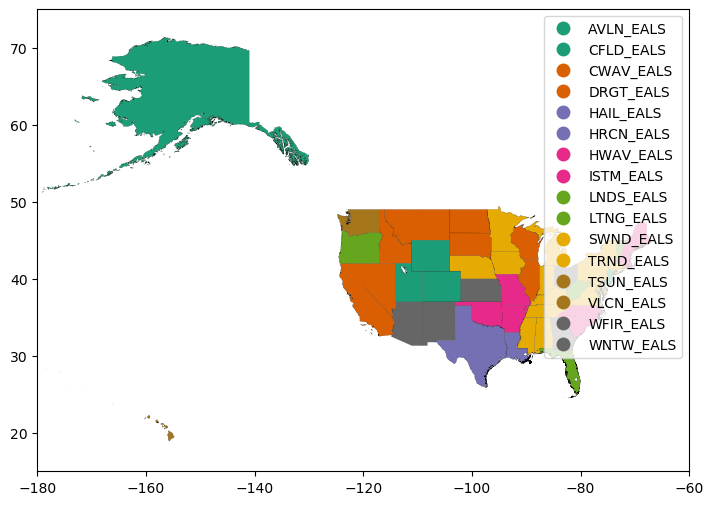

In [11]:
fig, ax = plt.subplots(figsize=(14,6))

xlim = (xmin, xmax)
ylim = (ymin, ymax)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.title("")

#create pallette

#create a map showing the populations of each state
EALsummary.plot(column = "LARGEST_EAL",legend = True, ax = ax, cmap='Dark2', edgecolor="black", linewidth=0.1)

#### We continue with analyzing each risk with an individual map to show risk variation across the U.S.

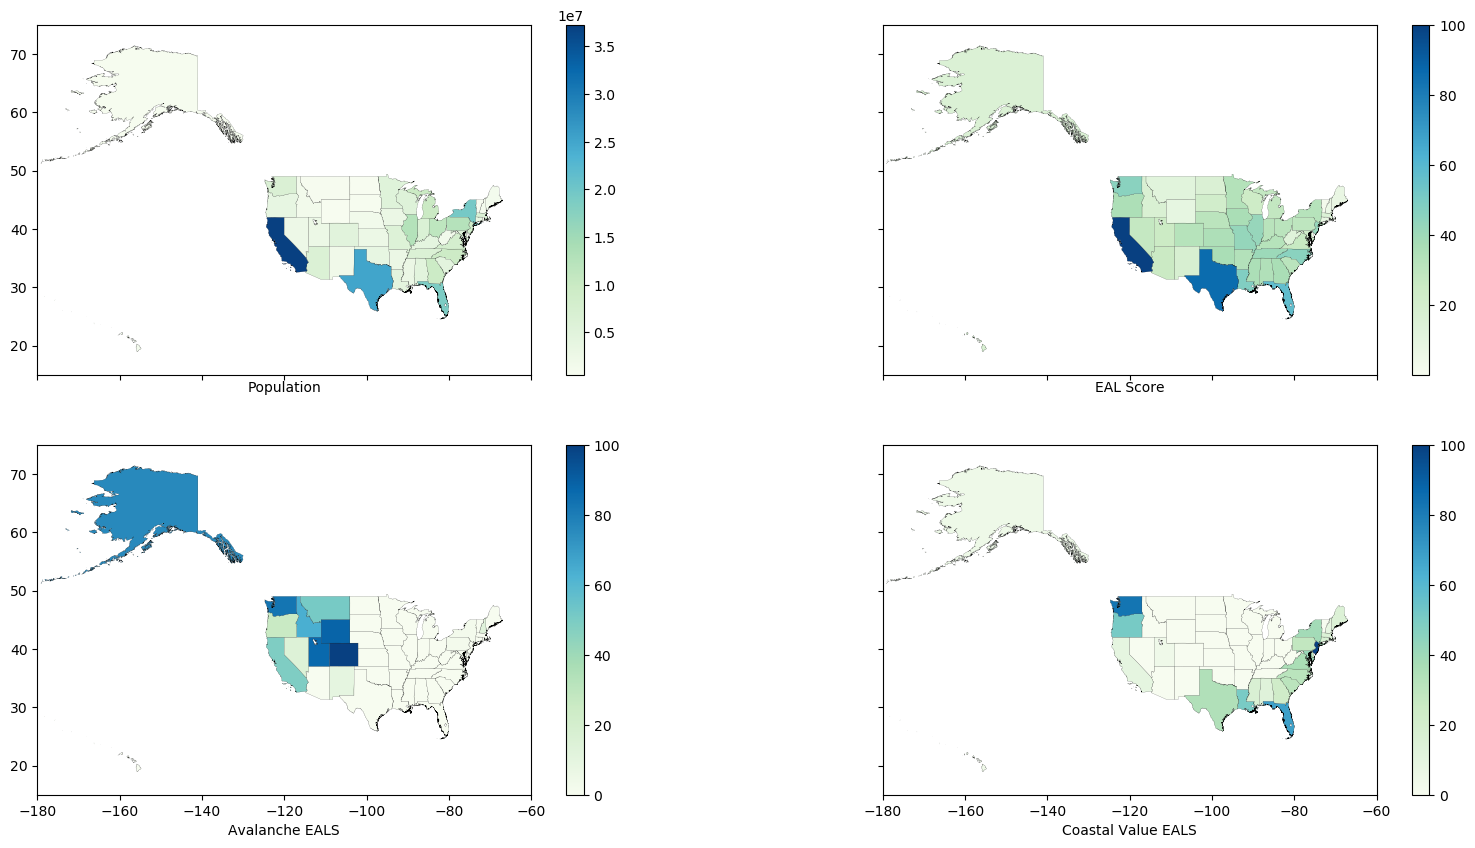

In [12]:
fig,[[ax1, ax2],[ax3, ax4]] = plt.subplots(2,2, figsize=(20,10), sharex=True, sharey=True)
#https://gis.stackexchange.com/questions/427178/plotting-multiple-subplots-with-different-shapefiles-in-background
#https://datascience.stackexchange.com/questions/33352/valueerror-not-enough-values-to-unpack-expected-4-got-2
ax1.set_xlim(xlim)
ax1.set_ylim(ylim)
ax1.set_xlabel("Population")
ax2.set_xlabel("EAL Score")
ax3.set_xlabel("Avalanche EALS")
ax4.set_xlabel("Coastal Value EALS")
EALsummary.plot(column = "POPULATION",legend = True, ax = ax1,cmap='GnBu',edgecolor="black",linewidth=0.1)
EALsummary.plot(column = "EAL_SCORE",legend = True, ax = ax2,cmap='GnBu',edgecolor="black",linewidth=0.1)
EALsummary.plot(column = "AVLN_EALS",legend = True, ax = ax3,cmap='GnBu',edgecolor="black",linewidth=0.1)
EALsummary.plot(column = "CFLD_EALS",legend = True, ax = ax4,cmap='GnBu',edgecolor="black",linewidth=0.1)

In [13]:
#Risk analysis
#create a new dataset
#extract the ending with EALR character
d = df.columns[df.columns.str.contains('EALR')]
test=df[d]
test['geometry']=df['geometry']
test['POPULATION']=df['POPULATION']
test['STATE']=df['STATE']
test=gpd.GeoDataFrame(test, geometry='geometry')
test = test.to_crs(4326)
test.head()

/tmp/ipykernel_2046951/1086253519.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['geometry']=df['geometry']
/tmp/ipykernel_2046951/1086253519.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['POPULATION']=df['POPULATION']
/tmp/ipykernel_2046951/1086253519.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/

,AVLN_EALR,CFLD_EALR,CWAV_EALR,DRGT_EALR,ERQK_EALR,HAIL_EALR,HWAV_EALR,HRCN_EALR,ISTM_EALR,LNDS_EALR,...,RFLD_EALR,SWND_EALR,TRND_EALR,TSUN_EALR,VLCN_EALR,WFIR_EALR,WNTW_EALR,geometry,POPULATION,STATE
0,Not Applicable,Relatively Low,Relatively Low,Relatively Moderate,Relatively Low,Relatively Low,Relatively Moderate,Relatively Moderate,Relatively Low,Relatively Moderate,...,Relatively Moderate,Relatively Moderate,Relatively High,Not Applicable,Not Applicable,Relatively Low,Relatively Low,"MULTIPOLYGON (((-88.07943 30.25227, -88.07932 ...",4779736,Alabama
1,Relatively High,Very Low,Relatively Low,Very Low,Relatively Moderate,Very Low,Very Low,Not Applicable,Very Low,Insufficient Data,...,Very Low,Very Low,Very Low,Very Low,Relatively Moderate,Insufficient Data,Very Low,"MULTIPOLYGON (((-179.10754 51.30120, -179.1054...",710231,Alaska
2,Very Low,Not Applicable,Very Low,Relatively Moderate,Relatively Low,Relatively Low,Relatively Moderate,Very Low,Very Low,Relatively Low,...,Relatively Low,Relatively Low,Very Low,Not Applicable,Not Applicable,Relatively High,Very Low,"POLYGON ((-114.05006 37.00020, -114.03803 37.0...",6392017,Arizona
3,Not Applicable,Not Applicable,Relatively Moderate,Relatively Moderate,Relatively Moderate,Relatively Moderate,Relatively High,Very Low,Very High,Relatively Moderate,...,Relatively Moderate,Relatively High,Relatively High,Not Applicable,Not Applicable,Relatively Low,Relatively High,"POLYGON ((-89.73310 36.00061, -89.73305 36.000...",2915918,Arkansas
4,Relatively Moderate,Relatively Low,Very Low,Very High,Very High,Relatively Low,Relatively Moderate,Very Low,Relatively Low,Relatively High,...,Relatively High,Relatively Low,Relatively Low,Relatively High,Relatively Moderate,Very High,Very Low,"MULTIPOLYGON (((-117.21222 32.77345, -117.2125...",37253956,California


In [14]:
colors = ["#fdf1cb", "#f0ccb4","#e3a69d", "#d78186", "#ca5b6f","#bd3658","#b01041"]

bins = ['Not Applicable', 'Insufficient Data', 'Very Low', 'Relatively Low'
            , 'Relatively Moderate', 'Relatively High', 'Very High']
Values = ['Not Applicable', 'Insufficient Data', 'Very Low', 'Relatively Low'
            , 'Relatively Moderate', 'Relatively High', 'Very High']
colors_1=dict(zip(Values, colors))

# Replace the characters in the dataset

rtn_dict = {'Not Applicable': '1.Not Applicable', 'Insufficient Data': '2.Insufficient Data', 'Very Low': '3.Very Low', 'Relatively Low': '4.Relatively Low'
            , 'Relatively Moderate': '5.Relatively Moderate', 'Relatively High': '6.Relatively High', 'Very High': '7.Very High'}
for x in range(0,18):
    test.iloc[:,x] = test.iloc[:,x].map(rtn_dict)

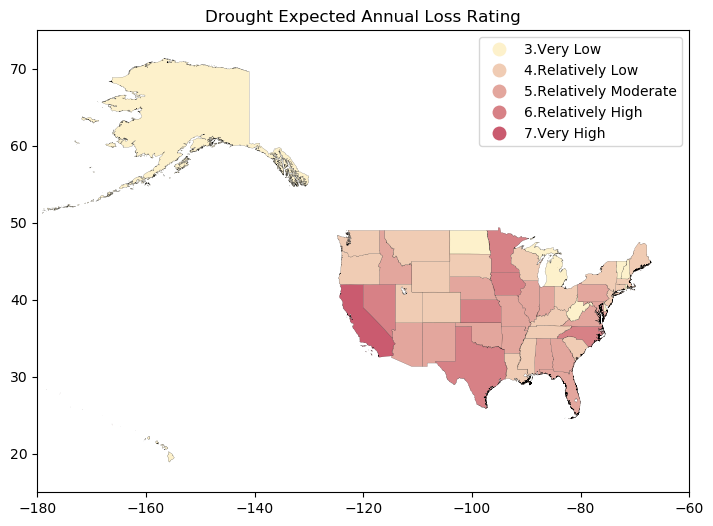

In [15]:
fig, ax = plt.subplots(figsize=(14,6))

xlim = (xmin, xmax)
ylim = (ymin, ymax)

ax.set_xlim(xlim)
ax.set_ylim(ylim)
plt.title("Drought Expected Annual Loss Rating")

test.plot(
    ax = ax,
    legend=True,
    column='DRGT_EALR',
    cmap=ListedColormap(colors),
    classification_kwds={ 'bins': bins,  },
    norm=Normalize(0, len(colors)),
    edgecolor="black",
    linewidth=0.1,
)

#### Case 2

In Santa Barbara County, EAL each year due to natural hazards is Very High when compared to the rest of the U.S., with a score of 58.54. Approximately 99.6% of U.S. counties have a lower EAL and approximately 87.9% of counties in California have a lower EAL.

The Santa Barbara County Office of Emergency Management (SBCOEM) may want to analyze this data. The SBCOEM is responsible for the mitigation, preparedness, planning, coordination of response, and recovery activities related to county emergencies and disasters. As a member of SBCOEM you may be tasked with determining the EAL and annualized frequency for each hazard type within the County. 

This analysis could assist with the development of the Santa Barbara Emergency Response Plan. This analysis will inform response plan decisions and hopefully reduce the EAL for future events. 

In [18]:
#read in county data
county_df = pd.read_csv("data/NRI_Table_Counties.csv")

#### 1. EAL per Hazard Bar Plot

           COUNTY Hazard Type       value             Hazard
0   Santa Barbara   AVLN_EALS         NaN          Avalanche
1   Santa Barbara   CFLD_EALS    3.033957   Coastal Flooding
2   Santa Barbara   CWAV_EALS    0.000000          Cold Wave
3   Santa Barbara   DRGT_EALS  100.000000            Drought
4   Santa Barbara   ERQK_EALS   31.374314         Earthquake
5   Santa Barbara   HAIL_EALS    6.487499               Hail
6   Santa Barbara   HWAV_EALS   16.099592          Heat Wave
7   Santa Barbara   HRCN_EALS         NaN          Hurricane
8   Santa Barbara   ISTM_EALS   14.337200          Ice Storm
9   Santa Barbara   LNDS_EALS   19.769318          Landslide
10  Santa Barbara   LTNG_EALS   10.408416          Lightning
11  Santa Barbara   RFLD_EALS   16.094397  Riverine Flooding
12  Santa Barbara   SWND_EALS   10.701132        Strong Wind
13  Santa Barbara   TRND_EALS    4.408659            Tornado
14  Santa Barbara   TSUN_EALS    7.751609            Tsunami
15  Santa Barbara   VLCN

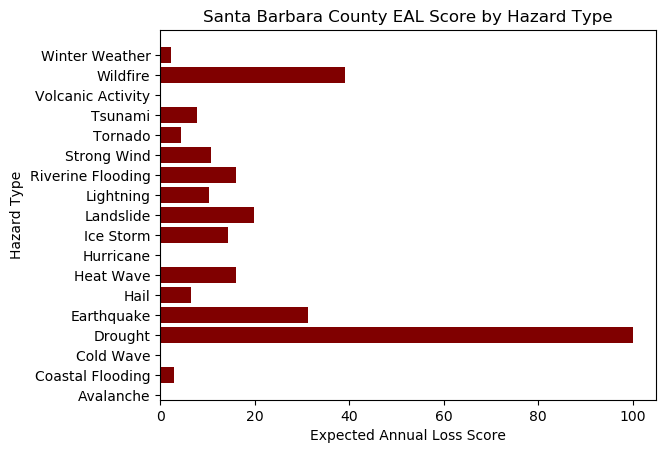

In [19]:
#filter our columns by state and county 
filter_county = county_df.loc[(county_df['STATE'] == 'California') & (county_df['COUNTY'] == 'Santa Barbara')]
filter_county = filter_county[['STATE', 'COUNTY', 'AVLN_EALS','CFLD_EALS','CWAV_EALS','DRGT_EALS','ERQK_EALS','HAIL_EALS','HWAV_EALS','HRCN_EALS','ISTM_EALS','LNDS_EALS','LTNG_EALS','RFLD_EALS','SWND_EALS','TRND_EALS','TSUN_EALS','VLCN_EALS','WFIR_EALS','WNTW_EALS']]

#select columns of interest (EAL score for each hazard)
filter_county = filter_county.reset_index()
filter_county = pd.melt(filter_county, id_vars='COUNTY', value_vars=['AVLN_EALS','CFLD_EALS','CWAV_EALS','DRGT_EALS','ERQK_EALS','HAIL_EALS','HWAV_EALS','HRCN_EALS','ISTM_EALS','LNDS_EALS','LTNG_EALS','RFLD_EALS','SWND_EALS','TRND_EALS','TSUN_EALS','VLCN_EALS','WFIR_EALS','WNTW_EALS'])
filter_county.rename(columns = {'variable':'Hazard Type'}, inplace = True)

#add column with common name for hazards
hazard = ['Avalanche', 'Coastal Flooding', 'Cold Wave', 'Drought', 'Earthquake', 'Hail', 'Heat Wave', 'Hurricane', 'Ice Storm', 'Landslide', 'Lightning', 'Riverine Flooding', 'Strong Wind', 'Tornado', 'Tsunami', 'Volcanic Activity', 'Wildfire', 'Winter Weather']
filter_county['Hazard'] = hazard
print(filter_county)

#create a bar plot
plt.barh(filter_county['Hazard'], filter_county['value'], color = 'maroon')
plt.title('Santa Barbara County EAL Score by Hazard Type')
plt.xlabel('Expected Annual Loss Score')
plt.ylabel('Hazard Type')
#plt.xticks(rotation = 90)
plt.show()

#### 2. Expected Frequency per Hazards Bar Plot

           COUNTY Hazard Type      value             Hazard
0   Santa Barbara  AVLN_AFREQ        NaN          Avalanche
1   Santa Barbara  CFLD_AFREQ   1.512000   Coastal Flooding
2   Santa Barbara  CWAV_AFREQ   0.000000          Cold Wave
3   Santa Barbara  DRGT_AFREQ  79.447767            Drought
4   Santa Barbara  ERQK_AFREQ   0.007338         Earthquake
5   Santa Barbara  HAIL_AFREQ   0.042791               Hail
6   Santa Barbara  HWAV_AFREQ   1.778902          Heat Wave
7   Santa Barbara  HRCN_AFREQ        NaN          Hurricane
8   Santa Barbara  ISTM_AFREQ   0.014890          Ice Storm
9   Santa Barbara  LNDS_AFREQ   0.020809          Landslide
10  Santa Barbara  LTNG_AFREQ   0.655431          Lightning
11  Santa Barbara  RFLD_AFREQ   1.791667  Riverine Flooding
12  Santa Barbara  SWND_AFREQ   0.040848        Strong Wind
13  Santa Barbara  TRND_AFREQ   0.119997            Tornado
14  Santa Barbara  TSUN_AFREQ   0.019035            Tsunami
15  Santa Barbara  VLCN_AFREQ        NaN

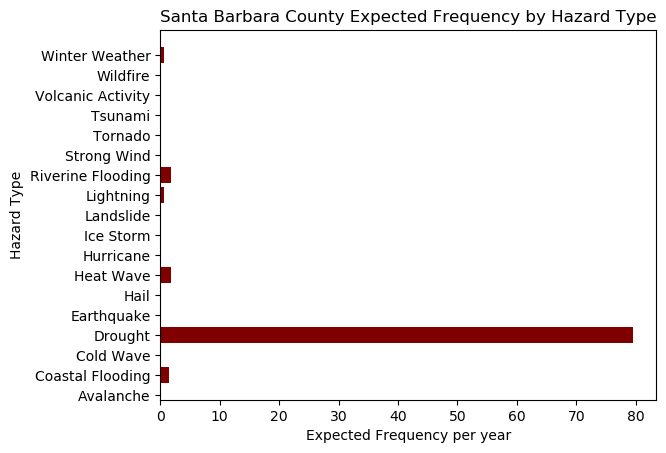

In [20]:

#filter our columns by state and county 
filter_county1 = county_df.loc[(county_df['STATE'] == 'California') & (county_df['COUNTY'] == 'Santa Barbara')]
filter_county1 = filter_county1[['STATE', 'COUNTY', 'AVLN_AFREQ','CFLD_AFREQ','CWAV_AFREQ','DRGT_AFREQ','ERQK_AFREQ','HAIL_AFREQ','HWAV_AFREQ','HRCN_AFREQ','ISTM_AFREQ','LNDS_AFREQ','LTNG_AFREQ','RFLD_AFREQ','SWND_AFREQ','TRND_AFREQ','TSUN_AFREQ','VLCN_AFREQ','WFIR_AFREQ','WNTW_AFREQ']]
filter_county1

#select columns of interest (annaluized frequency for each hazard)
filter_county1 = filter_county1.reset_index()
filter_county1 = pd.melt(filter_county1, id_vars='COUNTY', value_vars=['AVLN_AFREQ','CFLD_AFREQ','CWAV_AFREQ','DRGT_AFREQ','ERQK_AFREQ','HAIL_AFREQ','HWAV_AFREQ','HRCN_AFREQ','ISTM_AFREQ','LNDS_AFREQ','LTNG_AFREQ','RFLD_AFREQ','SWND_AFREQ','TRND_AFREQ','TSUN_AFREQ','VLCN_AFREQ','WFIR_AFREQ','WNTW_AFREQ'])
filter_county1.rename(columns = {'variable':'Hazard Type'}, inplace = True)

#add column with common name for hazards
hazard = ['Avalanche', 'Coastal Flooding', 'Cold Wave', 'Drought', 'Earthquake', 'Hail', 'Heat Wave', 'Hurricane', 'Ice Storm', 'Landslide', 'Lightning', 'Riverine Flooding', 'Strong Wind', 'Tornado', 'Tsunami', 'Volcanic Activity', 'Wildfire', 'Winter Weather']
filter_county1['Hazard'] = hazard
print(filter_county1)

#create a bar plot
plt.barh(filter_county1['Hazard'], filter_county1['value'], color = 'maroon')
plt.title('Santa Barbara County Expected Frequency by Hazard Type')
plt.xlabel('Expected Frequency per year')
plt.ylabel('Hazard Type')
#plt.xticks(rotation = 90)
plt.show()

The EAL bar plot informs us that the hazard types associated with the highest EAL scores are drought, wildfire, and earthquakes. The expected frequency bar plot illustrates that drought is the most common hazard to occur per year, with riverine flooding and heat waves following. One could infer that although wildfires and earthquakes are less frequent, they have a larger economic impact than hazards occuring more frequently (flooding, heat waves). Drought is the most frequent hazard and has the highest EAL score in Santa Barbara County. With this information, the SBCOEM can make informed emergency response planning decisions. This analysis is helpful for determining how and where to allocate resources during these types of events. 

<a id='binder'></a> 
### Binder Environment

```
launch with myBinder
[![Binder](https://mybinder.org/badge_logo.svg)](https://mybinder.org/v2/gh/ericamarie9016/FEMA_Hazards/HEAD)
```

<a id='references'></a> 
### References

1. FEMA National Risk Index data download page: https://hazards.fema.gov/nri/data-resources#shpDownload
2. Expected Annual Loss: https://hazards.fema.gov/nri/expected-annual-loss
3. Annualized Frequency: https://hazards.fema.gov/nri/annualized-frequency
4. National Risk Index technical documentation: https://www.fema.gov/sites/default/files/documents/fema_national-risk-index_technical-documentation.pdf
5. Reading Shapefile ZIPs from a URL in Python 3: https://medium.com/@loldja/reading-shapefile-zips-from-a-url-in-python-3-93ea8d727856
6. Plotting multiple subplots with shapefiles: https://gis.stackexchange.com/questions/427178/plotting-multiple-subplots-with-different-shapefiles-in-background
7. Seaborn: https://seaborn.pydata.org/